In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [53]:
oecd_path='dataset/oecd_bli_2015.csv'
gdp_path='dataset/gdp_per_capita.csv'
oecd_df=pd.read_csv(oecd_path,delimiter=',',header=0,na_values="n/a")
gdp_df=pd.read_csv(gdp_path,thousands=',',encoding='latin1',delimiter='\t',na_values='n/a')

In [54]:
gdp_df.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [55]:
oecd_df.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [71]:
from collections import Counter
print(dict(Counter(oecd_df['Indicator']))['Life satisfaction'])

179


In [56]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    print(oecd_bli)
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [57]:
country_stats=prepare_country_stats(oecd_df,gdp_df)

Indicator        Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria                   27.0           3.4                          7.1   
Belgium                   21.0           6.6                          4.5   
Brazil                    18.0           7.9                          4.0   
Canada                    15.0           1.3                         10.5   
Chile                     46.0           6.9                          2.0   
Czech Republic            16.0           2.8                          6.8   
Denmark                   15.0           3.9                          7.0   
Estonia                    9.0           5.5                          3.3   
Finland                   15.0           2.4                          9.0   
France                    12.0           5.0                          3.5   

In [72]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [88]:
X=np.array(country_stats['GDP per capita'].values).reshape(-1,1)
y=np.array(country_stats['Life satisfaction'].values).reshape(-1,1)

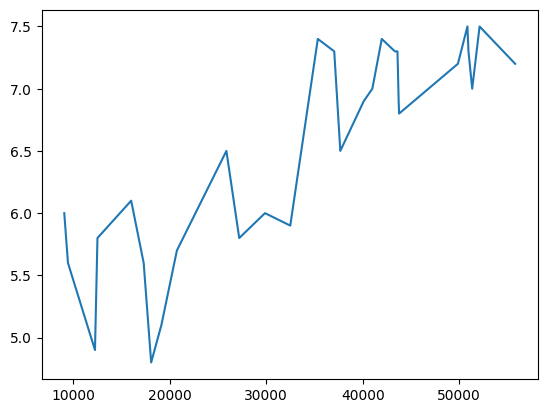

In [89]:
plt.plot(X,y)

In [100]:
model_linear=sklearn.linear_model.LinearRegression()
model_linear.fit(X,y)
y_pred_linear=model_linear.predict(X)

In [102]:
from sklearn.neighbors import KNeighborsRegressor
model_neighbor=KNeighborsRegressor(n_neighbors=3)
model_neighbor.fit(X,y)
y_pred_neighbor=model_neighbor.predict(X)

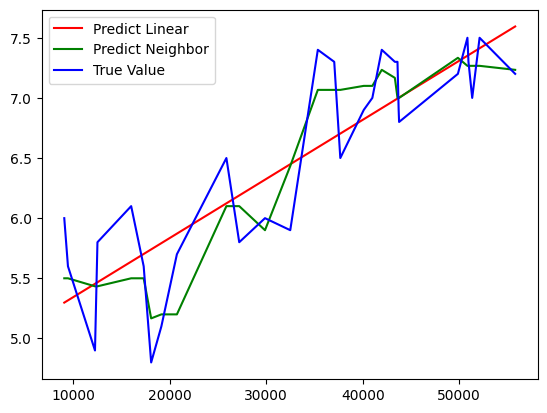

In [103]:
plt.plot(X,y_pred_linear,color='red',label='Predict Linear')
plt.plot(X,y_pred_neighbor,color='green',label='Predict Neighbor')
plt.plot(X,y,color='blue',label='True Value')
plt.legend()
plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error
kneighbor_mae=mean_absolute_error(y,y_pred_neighbor)
linear_mae=mean_absolute_error(y,y_pred_linear)

In [105]:
print(f"kneighbor_mae:{kneighbor_mae}")
print(f"linear_mae:{linear_mae}")

kneighbor_mae:0.26781609195402295
linear_mae:0.3553042942792172
